In [1]:
# Standard Imports
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("ticks")


Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/Audiobooks_data.csv', header=None,
                 names=[f"v{i}" for i in range(0, 12)])
df.head()


,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
0,873,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1


# Balancing the dataset by removing 0-target rows.
With Balancing: recall(0) = 0.84, recall(1) = 0.74  
Without Balancing: recall(0) = 1.0, recall(1) = 0.41  

In [3]:
number_of_ones = sum(df['v11'] == 1)
g = df.groupby('v11')
df = g.apply(lambda group: group.sample(
    number_of_ones, replace=False)).reset_index(drop=True)

 # Balancing the Dataset

In [4]:
X_unscaled = df.iloc[:, 1:-1]
y = df['v11']


 # Scale Inputs

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X_unscaled)


 # Train Test Splitting

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [7]:
model = keras.Sequential([
    keras.layers.Dense(units=20, input_dim=10, activation='tanh'),
    # keras.layers.Dense(units=50, activation='tanh'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile('adam', 'binary_crossentropy')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,
          batch_size=32, callbacks=[keras.callbacks.EarlyStopping(patience=3)])


Train on 3355 samples, validate on 1119 samples
Epoch 1/10
3355/3355 [==============================] - 4s 1ms/step - loss: 0.6419 - val_loss: 0.5807
Epoch 2/10
3355/3355 [==============================] - 1s 193us/step - loss: 0.5211 - val_loss: 0.5144
Epoch 3/10
3355/3355 [==============================] - 1s 203us/step - loss: 0.4756 - val_loss: 0.4816
Epoch 4/10
3355/3355 [==============================] - 1s 196us/step - loss: 0.4522 - val_loss: 0.4644
Epoch 5/10
3355/3355 [==============================] - 1s 202us/step - loss: 0.4370 - val_loss: 0.4507
Epoch 6/10
3355/3355 [==============================] - 1s 193us/step - loss: 0.4266 - val_loss: 0.4411
Epoch 7/10
3355/3355 [==============================] - 1s 197us/step - loss: 0.4193 - val_loss: 0.4355
Epoch 8/10
3355/3355 [==============================] - 1s 213us/step - loss: 0.4131 - val_loss: 0.4302
Epoch 9/10
3355/3355 [==============================] - 1s 184us/step - loss: 0.4080 - val_loss: 0.4265
Epoch 10/10
3355/3

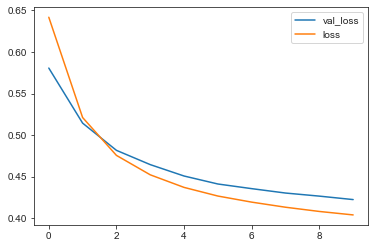

In [8]:
pd.DataFrame(model.history.history).plot()


In [9]:
print(classification_report(y_test, model.predict_classes(X_test)))


precision    recall  f1-score   support

           0       0.75      0.86      0.80       575
           1       0.83      0.69      0.76       544

    accuracy                           0.78      1119
   macro avg       0.79      0.78      0.78      1119
weighted avg       0.79      0.78      0.78      1119

